## pandas from the ground up

###  https://www.youtube.com/watch?v=5JnMutdy6Fw&t=47s 

### Exercises-4

In [1]:
data_folder = "C:/Users/Admin/Dropbox/Python/Jupyter Notebook files/Exercises_pandasfromthegroundup/"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
titles = pd.read_csv(data_folder + "titles.csv", index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [4]:
cast = pd.read_csv(data_folder + "cast.csv", index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [5]:
batsup = cast[(cast.character == "Superman") | (cast.character == "Batman")].groupby(['year', 'character']).size().unstack(level='character').dropna().sort_values('year')
batsup.head(5)

character,Batman,Superman
year,,
1973,1.0,2.0
1981,1.0,1.0
1985,2.0,2.0
1991,1.0,1.0
1992,1.0,1.0


In [6]:
batsup[batsup.Batman < batsup.Superman]

character,Batman,Superman
year,,
1973,1.0,2.0
2017,2.0,3.0


### How many years have been "Batman years", with more Batman characters than Superman characters?

In [7]:
batsup[batsup.Batman > batsup.Superman].Batman.count()

8

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

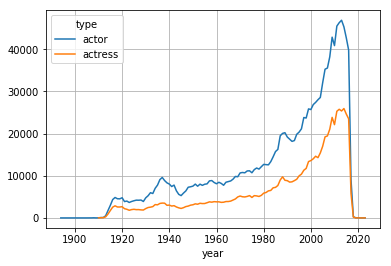

In [8]:
cast.groupby(['year', 'type']).n.count().unstack('type').plot(grid=True)

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

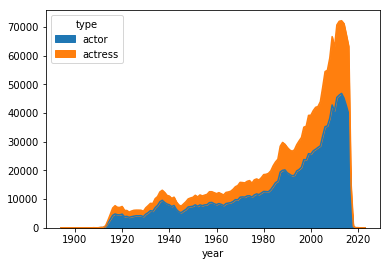

In [9]:
cast.groupby(['year', 'type']).n.count().unstack('type').plot(kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

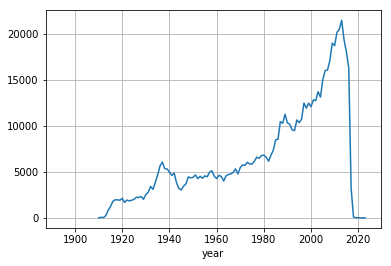

In [10]:
ddd = cast.groupby(['year', 'type']).n.count().unstack('type')

(ddd.actor - ddd.actress).plot(grid=True)

### Plot the fraction of roles that have been 'actor' roles each year in the history of film.

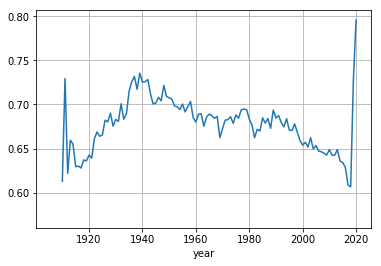

In [11]:
(ddd.actor/(ddd.actor + ddd.actress)).plot(grid=True)

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

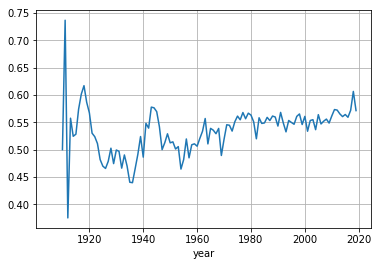

In [12]:
hhh = cast[(cast.n == 2) & (cast.type == "actor")].sort_values('year').groupby('year').count().n
mmm = cast[(cast.n == 2) & (cast.type == "actress")].sort_values('year').groupby('year').count().n
(hhh / (hhh + mmm)).plot(grid=True)

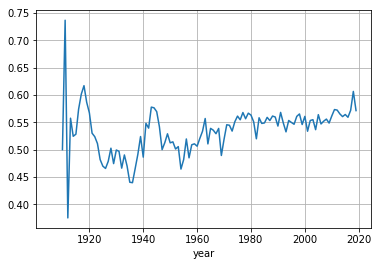

In [13]:
hhhmmm = cast[cast.n == 2].groupby(['year', 'type']).size().unstack('type')
(hhhmmm.actor / (hhhmmm.actor + hhhmmm.actress)).plot(grid=True)

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

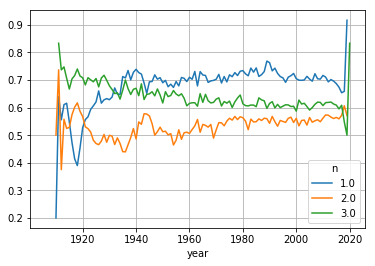

In [14]:
hm_3 = cast[cast.n <= 3].groupby(['year', 'type', 'n']).size().unstack('type').unstack('n')
hm_3
(hm_3.actor / (hm_3.actor + hm_3.actress)).plot(grid=True)

In [15]:
qqq = hm_3.unstack('n')
type(qqq)

pandas.core.series.Series